In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [78]:
def plot_scatterplot(data, x, y, figsize, hue):
    plt.figure(figsize=figsize)
    sns.scatterplot(x= x,y= y,data=data
                , palette='rainbow', hue = hue, s= 100)
    plt.xticks(rotation = 90)
    plt.show()


## Read all the files

In [91]:
df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_leads = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/leads.csv', encoding= 'unicode_escape')
df_tc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/telecallers.csv')

## Basic stats lead comments dataframe

In [4]:
df_lc.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z


In [5]:
df_lc.shape

(12335, 8)

In [6]:
df_lc.apply(pd.Series.nunique)


id              12335
telecallerId        3
leadId           9916
client             22
status             48
comments         1262
calledAt          647
createdAt       12280
dtype: int64

In [7]:
df_lc.describe()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
count,12335,12335,12335,11491,12335,3521,12335,12335
unique,12335,3,9916,22,48,1262,647,12280
top,837402cb-d52a-458d-bc55-f50a75bafd3c,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,615f234a-6490-4429-abf8-b92d54437f1a,Zomato,CNP/Switched Off/Not Reachable,Not Looking for Job,2020-05-01T10:30:00Z,2019-12-26T17:31:27.197Z
freq,1,8770,23,5236,3825,210,1872,2


In [8]:
## no of call made of each lead

df_lc['leadId'].value_counts()

615f234a-6490-4429-abf8-b92d54437f1a    23
01b7a299-77a9-4b8b-a440-7ff7045e5971    10
46d8e22e-5ad6-4726-8705-7da176d4aba5     9
ec9ab272-e7cb-4614-b87d-d8f49998dd48     8
a30e9597-3512-4d31-b1c4-5e531eb24b07     8
                                        ..
233d74c0-2235-4cfa-a8aa-d4e119f12ddf     1
1ac89087-7f19-4762-a7f8-a5e30c7ab6ca     1
88f88109-87fc-4103-8eb1-dce96daa9b24     1
2c714d3c-d8b8-4cf7-8a3b-6b4c136ef2d9     1
410bfccc-6edb-4f15-a35a-3b86f9b55b08     1
Name: leadId, Length: 9916, dtype: int64

## Basic stats lead dataframe

In [9]:
df_leads.head()

,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
0,00021a29-83e4-48d3-8cc3-0bc729f087fd,NaN,KUPENDRA,1234567890,NaN,NaN,Airavatha data,True,2019-12-26T18:17:13.115Z,2019-11-01T05:41:00Z
1,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,e50fccfe-82aa-434a-ad92-9d3f9d651f84,Dinkle Unknown,1234567890,Delhi/NCR,Delhi-NCR,delhi-18-33yo-10-15k-hdat-july-17,False,2019-12-26T17:49:53.471Z,2019-08-25T00:00:00Z
2,0013dc91-e0e3-48f6-9518-6cf8389dd923,NaN,Elikatte Kumaraswamy,1234567890,Hyderabad,Telangana,WhatsApp OptIn Form,False,2019-12-26T17:21:04.021Z,2019-07-25T00:00:00Z
3,001477a2-80d0-4b6d-a392-16aeaeef805d,4e0222f0-42aa-4660-976b-8e9329b4b1a7,Raju Unknown,1234567890,Hyderabad,Telangana,Referrals,False,2019-12-26T17:26:31.459Z,2019-06-03T00:00:00Z
4,0014961d-9b66-4cae-85aa-acb89cd51f1e,NaN,Arunkumar Unknown,1234567890,Bangalore,Karnataka,Reused Leads,False,2019-12-26T17:21:05.065Z,2019-04-01T00:00:00Z


In [10]:
df_leads.shape

(9916, 10)

In [11]:
df_leads.apply(pd.Series.nunique)


id             9916
userId         5977
name           6511
phoneNumber       1
city             61
state            20
source          108
isExternal        2
createdAt      9880
receivedAt     1308
dtype: int64

In [12]:
df_leads.describe(include = 'all')

,id,userId,name,phoneNumber,city,state,source,isExternal,createdAt,receivedAt
count,9916,6073,9916,9.916000e+03,9178,8536,9914,9916,9916,9916
unique,9916,5977,6511,NaN,61,20,108,2,9880,1308
top,63d2b3c4-7aa2-4d10-9c37-a98bed0eae6c,9fece3f1-0519-400b-bdd0-3a6280c76d74,firstName lastName,NaN,Hyderabad,Telangana,Referrals,False,2019-12-26T17:30:59.081Z,2019-07-25T00:00:00Z
freq,1,14,100,NaN,3413,3426,3656,8569,2,2283
mean,NaN,NaN,NaN,1.234568e+09,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.234568e+09,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.234568e+09,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.234568e+09,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.234568e+09,NaN,NaN,NaN,NaN,NaN,NaN


## Basic stats telecaller dataframe

In [13]:
df_tc.head()

,id,name,phoneNumber,createdAt
0,4248b521-ce3f-4897-a30d-35c9ee81f746,Amila,1234567890,2019-12-25T05:50:26.375Z
1,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,Sheeba,1234567890,2019-12-25T05:50:26.385Z
2,7717ef5d-38ec-44df-af3b-7a2446071e48,Islam,1234567890,2019-12-25T05:50:26.388Z
3,89b29324-8f3b-4b50-b3f7-0a3e0918e4d2,Rakshith,1234567890,2019-12-25T05:50:26.390Z
4,87112942-9c14-401a-9231-d9b4c2eee0c5,Manasa,1234567890,2019-12-25T05:50:26.393Z


In [14]:
df_tc.shape

(5, 4)

In [15]:
df_tc.apply(pd.Series.nunique)


id             5
name           5
phoneNumber    1
createdAt      5
dtype: int64

## Temporal Efficiency analysis

Here we try to find all how long do the tele callers take to close a lead

In [112]:
df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')
df_lc['client'] = df_lc['client'].str.replace('Uber eats' , 'Uber Eats')

In [113]:
df_lc.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,00028a99-c401-4048-9b75-b923cff55a79,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,724467a5-52d1-4989-a870-99ae65d3e0e8,Amazon Flex,Not Interested - Applied by Mistake,NaN,2019-07-25T17:00:00Z,2019-12-26T17:32:49.297Z
1,00033b17-3a2a-4769-8623-bb00adf1e4c5,4248b521-ce3f-4897-a30d-35c9ee81f746,65d4429f-cb34-436d-9020-1fd6f364367f,KFC,RNR,NaN,2019-10-10T17:30:00Z,2019-12-26T18:09:38.408Z
2,0003dcc7-05d0-4736-a415-5e67ea95c24e,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,fea7fb85-3355-4747-98fd-dae1b9aca52a,Lalamove,Not Interested - Disconnected the Call,NaN,2019-08-30T14:00:00Z,2019-12-26T17:42:55.007Z
3,00042f93-1e19-418f-bf38-1a8a8f758952,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,3308d114-a9ed-4d81-8d08-50b28171790f,Zomato,Not Interested,Not Looking for Job,2020-06-01T10:30:00Z,2019-12-26T17:26:36.333Z
4,0006f07e-f4d1-4387-8540-fc8bf6e67676,fd904600-1e6e-4ab2-8be9-d7903aed9d3d,924cdffb-693f-4870-8179-d80571e1fc85,NaN,Not Applied,NaN,2020-04-01T10:30:00Z,2019-12-26T17:21:12.255Z


In [114]:
## convert timestamp data to datetime

df_lc['calledAt'] = pd.to_datetime(df_lc['calledAt'])
df_lc['createdAt'] = pd.to_datetime(df_lc['createdAt'])

In [115]:
## sort on createdAt and drop duplicates to find the first call record
df_lc = df_lc.sort_values(by = ['telecallerId', 'leadId', 'createdAt'], ascending = True).reset_index(drop = True)
df_first_call = df_lc.drop_duplicates(subset = ['telecallerId', 'leadId'], keep = 'first').reset_index(drop = True)

In [116]:
df_lc.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,65b4dc11-cb33-467e-b432-d81f082cc1fd,4248b521-ce3f-4897-a30d-35c9ee81f746,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,Zomato,Not Interested - Applied by Mistake,Not interested in doing zomato\nTold to cancel...,2019-08-28 15:00:00+00:00,2019-12-26 17:49:53.739000+00:00
1,7b16983c-903f-4b01-a3ca-817a624e0649,4248b521-ce3f-4897-a30d-35c9ee81f746,001ac28a-0353-4319-bffd-934e0f226f69,Zomato,Not Interested - Wrong Number,NaN,2019-10-03 14:30:00+00:00,2019-12-26 18:09:38.013000+00:00
2,e5f3c921-bf9f-493e-9da5-059b6df05b08,4248b521-ce3f-4897-a30d-35c9ee81f746,00a0a498-d5a3-44d4-91b7-594143fd9e12,Swiggy,Not Interested - Not Applied,NaN,2019-08-05 17:30:00+00:00,2019-12-26 17:36:13.436000+00:00
3,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26 17:36:13.790000+00:00
4,c9e27125-719d-4165-88d7-9e5f126e6342,4248b521-ce3f-4897-a30d-35c9ee81f746,00ceb2a9-83b3-4d9e-b818-f6828f5eb470,Zomato,Wrong Number/Number Not Valid,NaN,2019-07-22 15:30:00+00:00,2019-12-26 17:40:07.179000+00:00


In [117]:
df_first_call.head()

,id,telecallerId,leadId,client,status,comments,calledAt,createdAt
0,65b4dc11-cb33-467e-b432-d81f082cc1fd,4248b521-ce3f-4897-a30d-35c9ee81f746,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,Zomato,Not Interested - Applied by Mistake,Not interested in doing zomato\nTold to cancel...,2019-08-28 15:00:00+00:00,2019-12-26 17:49:53.739000+00:00
1,7b16983c-903f-4b01-a3ca-817a624e0649,4248b521-ce3f-4897-a30d-35c9ee81f746,001ac28a-0353-4319-bffd-934e0f226f69,Zomato,Not Interested - Wrong Number,NaN,2019-10-03 14:30:00+00:00,2019-12-26 18:09:38.013000+00:00
2,e5f3c921-bf9f-493e-9da5-059b6df05b08,4248b521-ce3f-4897-a30d-35c9ee81f746,00a0a498-d5a3-44d4-91b7-594143fd9e12,Swiggy,Not Interested - Not Applied,NaN,2019-08-05 17:30:00+00:00,2019-12-26 17:36:13.436000+00:00
3,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26 17:36:13.790000+00:00
4,c9e27125-719d-4165-88d7-9e5f126e6342,4248b521-ce3f-4897-a30d-35c9ee81f746,00ceb2a9-83b3-4d9e-b818-f6828f5eb470,Zomato,Wrong Number/Number Not Valid,NaN,2019-07-22 15:30:00+00:00,2019-12-26 17:40:07.179000+00:00


In [118]:
## rename column name before join

df_first_call = df_first_call.rename(columns = {'calledAt': 'firstCall'})

In [122]:
df_joined = df_lc[df_lc['status'] == 'Joined'].reset_index(drop = True)

In [123]:
df_joined = df_joined.rename(columns = {'createdAt' : 'joinedAt'})

In [124]:
## join first call data with leads call
df_first_call = pd.merge(df_first_call, df_joined[[ 'leadId', 'joinedAt']], how = 'left', \
                                                    on = [ 'leadId'])

In [125]:
## drop nan values
df_first_call = df_first_call.dropna(subset = ['joinedAt']).reset_index(drop = True)

In [109]:
df_first_call.head()

,id,telecallerId,leadId,client,status,comments,firstCall,createdAt,joinedAt
0,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07T11:30:00Z,2019-12-26T17:36:13.790Z,2019-12-26T17:36:13.790Z
1,e555ba11-d8ee-40ad-9da8-4e04a4e74f0e,4248b521-ce3f-4897-a30d-35c9ee81f746,1062b09a-a37c-4a5d-91e0-836967f6c0bc,Zomato,Joined,Joined in Zomato in May,2019-08-20T12:30:00Z,2019-12-26T17:52:59.681Z,2019-12-26T17:52:59.681Z
2,515f6bd0-ba70-4c5b-9113-5aee93db7bf9,4248b521-ce3f-4897-a30d-35c9ee81f746,184e5c7f-c180-4bcd-8496-38311323256d,Swiggy,Joined,Swiggy ID : 695859,2019-07-30T11:30:00Z,2019-12-26T17:36:17.008Z,2019-12-26T17:36:17.008Z
3,a09fcde9-145e-4dce-a7bb-960b5803420d,4248b521-ce3f-4897-a30d-35c9ee81f746,2275deca-8107-4bdb-a58c-1f165dcd23e0,Lalamove,Joined,20-Aug-19 Joined in Lalamove,2019-08-23T12:00:00Z,2019-12-26T18:02:53.804Z,2019-12-26T18:02:53.804Z
4,95f5198f-60ac-4311-a447-62e659adb726,4248b521-ce3f-4897-a30d-35c9ee81f746,25fbd9c8-6256-467d-beed-9379d4e1799f,Zomato,Joined,Working from June in Zomato,2019-08-14T15:30:00Z,2019-12-26T17:52:59.133Z,2019-12-26T17:52:59.133Z


In [128]:
## find difference between first call timestamp and joinedAt timestamp
df_first_call['time_to_convert'] = df_first_call['joinedAt'] - df_first_call['firstCall']
df_first_call['time_to_convert'] = df_first_call['time_to_convert'].apply(lambda x : x.days)

In [129]:
df_first_call.head()

,id,telecallerId,leadId,client,status,comments,firstCall,createdAt,joinedAt,time_to_convert
0,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26 17:36:13.790000+00:00,2019-12-26 17:36:13.790000+00:00,141
1,e555ba11-d8ee-40ad-9da8-4e04a4e74f0e,4248b521-ce3f-4897-a30d-35c9ee81f746,1062b09a-a37c-4a5d-91e0-836967f6c0bc,Zomato,Joined,Joined in Zomato in May,2019-08-20 12:30:00+00:00,2019-12-26 17:52:59.681000+00:00,2019-12-26 17:52:59.681000+00:00,128
2,515f6bd0-ba70-4c5b-9113-5aee93db7bf9,4248b521-ce3f-4897-a30d-35c9ee81f746,184e5c7f-c180-4bcd-8496-38311323256d,Swiggy,Joined,Swiggy ID : 695859,2019-07-30 11:30:00+00:00,2019-12-26 17:36:17.008000+00:00,2019-12-26 17:36:17.008000+00:00,149
3,a09fcde9-145e-4dce-a7bb-960b5803420d,4248b521-ce3f-4897-a30d-35c9ee81f746,2275deca-8107-4bdb-a58c-1f165dcd23e0,Lalamove,Joined,20-Aug-19 Joined in Lalamove,2019-08-23 12:00:00+00:00,2019-12-26 18:02:53.804000+00:00,2019-12-26 18:02:53.804000+00:00,125
4,95f5198f-60ac-4311-a447-62e659adb726,4248b521-ce3f-4897-a30d-35c9ee81f746,25fbd9c8-6256-467d-beed-9379d4e1799f,Zomato,Joined,Working from June in Zomato,2019-08-14 15:30:00+00:00,2019-12-26 17:52:59.133000+00:00,2019-12-26 17:52:59.133000+00:00,134


In [131]:
df_first_call = df_first_call[df_first_call['time_to_convert'] >= 0].reset_index(drop = True)

In [132]:
df_first_call.head()

,id,telecallerId,leadId,client,status,comments,firstCall,createdAt,joinedAt,time_to_convert
0,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26 17:36:13.790000+00:00,2019-12-26 17:36:13.790000+00:00,141
1,e555ba11-d8ee-40ad-9da8-4e04a4e74f0e,4248b521-ce3f-4897-a30d-35c9ee81f746,1062b09a-a37c-4a5d-91e0-836967f6c0bc,Zomato,Joined,Joined in Zomato in May,2019-08-20 12:30:00+00:00,2019-12-26 17:52:59.681000+00:00,2019-12-26 17:52:59.681000+00:00,128
2,515f6bd0-ba70-4c5b-9113-5aee93db7bf9,4248b521-ce3f-4897-a30d-35c9ee81f746,184e5c7f-c180-4bcd-8496-38311323256d,Swiggy,Joined,Swiggy ID : 695859,2019-07-30 11:30:00+00:00,2019-12-26 17:36:17.008000+00:00,2019-12-26 17:36:17.008000+00:00,149
3,a09fcde9-145e-4dce-a7bb-960b5803420d,4248b521-ce3f-4897-a30d-35c9ee81f746,2275deca-8107-4bdb-a58c-1f165dcd23e0,Lalamove,Joined,20-Aug-19 Joined in Lalamove,2019-08-23 12:00:00+00:00,2019-12-26 18:02:53.804000+00:00,2019-12-26 18:02:53.804000+00:00,125
4,95f5198f-60ac-4311-a447-62e659adb726,4248b521-ce3f-4897-a30d-35c9ee81f746,25fbd9c8-6256-467d-beed-9379d4e1799f,Zomato,Joined,Working from June in Zomato,2019-08-14 15:30:00+00:00,2019-12-26 17:52:59.133000+00:00,2019-12-26 17:52:59.133000+00:00,134


In [133]:
## add telecaller name for visualisation
df_first_call = pd.merge(df_first_call, df_tc[['id', 'name']].rename(columns = {'id' : 'telecallerId'}), how = 'left', \
        on = 'telecallerId')

In [134]:
df_first_call.groupby(by = ['name'], as_index = False).mean()


,name,time_to_convert
0,Amila,134.783784
1,Rakshith,125.714286
2,Sheeba,94.355556


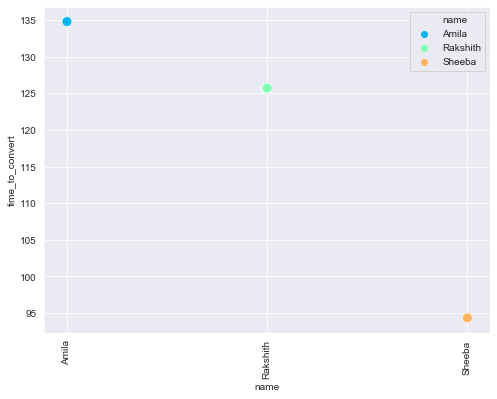

In [135]:
## plot the above table
plot_scatterplot(data = df_first_call.groupby(by = ['name'], as_index = False).mean(), \
                 x = 'name', y = 'time_to_convert', figsize = (8,6), hue = 'name')


In [136]:
df_first_call.groupby(by = ['name', 'client'], as_index = False).mean()


,name,client,time_to_convert
0,Amila,Amazon Flex,145.333333
1,Amila,Lalamove,124.400000
2,Amila,Lynk,80.000000
3,Amila,Rapido,84.000000
4,Amila,Swiggy,144.416667
5,Amila,Zomato,139.428571
6,Rakshith,Zomato,125.714286
7,Sheeba,Amazon Flex,84.000000
8,Sheeba,Lynk,74.000000
9,Sheeba,Micelio,49.500000


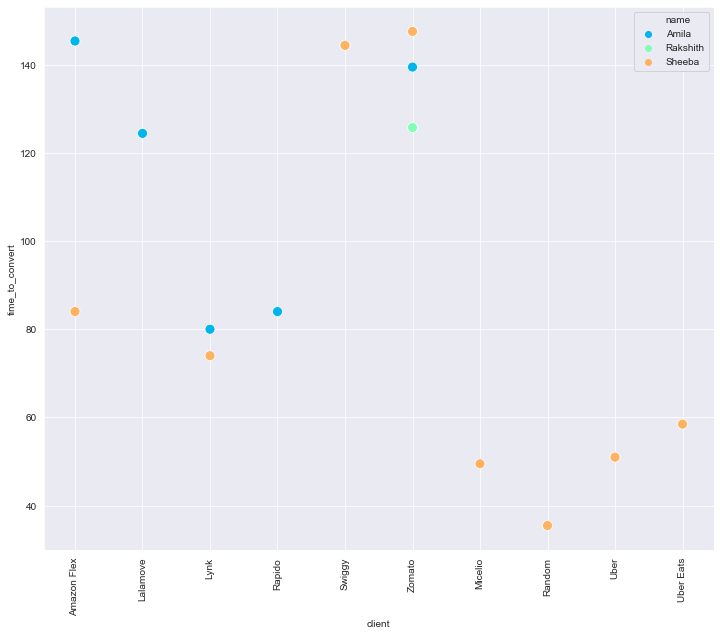

In [137]:
## plot the above table
plot_scatterplot(data = df_first_call.groupby(by = ['name', 'client'], as_index = False).mean(), \
                 x = 'client', y = 'time_to_convert', figsize = (12,10), hue = 'name')


In [74]:
df_isExternal = pd.merge(df_first_call, df_leads[['id', 'isExternal']].rename(columns = {'id' : 'leadId'}), \
         how = 'left', on = 'leadId').groupby(by = ['name', 'isExternal'], as_index = False).mean()


In [75]:
df_isExternal

,name,isExternal,time_to_convert
0,Amila,False,130.567568
1,Rakshith,False,122.857143
2,Sheeba,False,91.456522
3,Sheeba,True,33.500000


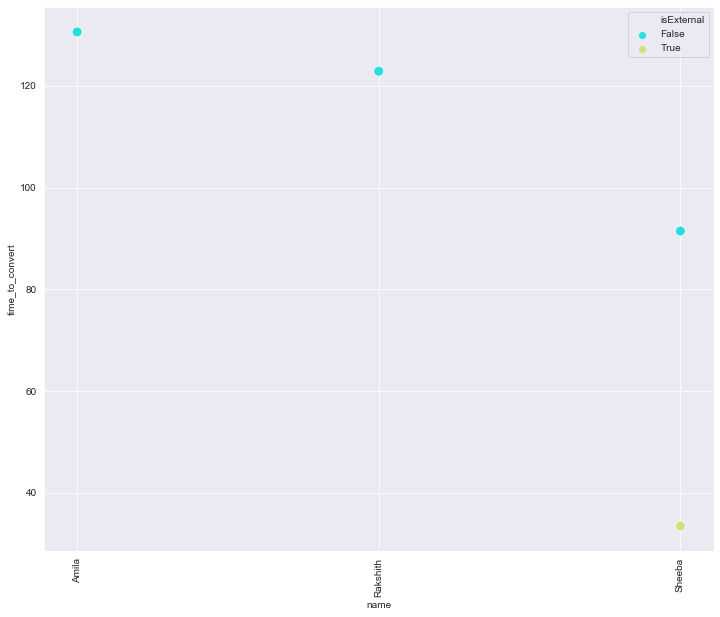

In [81]:
## plot the above table
plot_scatterplot(data = df_isExternal, x = 'name', y = 'time_to_convert', figsize = (12,10), hue = 'isExternal')


## Calling efficiency

In [38]:
## read lead calls data

df_lc = pd.read_csv('/Users/abhisheksharma/Downloads/vahan_data/lead_calls.csv')


In [39]:
## convert timestamp data to datetime objects

df_lc['calledAt'] = pd.to_datetime(df_lc['calledAt'])
df_lc['client'] = df_lc['client'].str.replace('Uber eats' , 'Uber Eats')


In [40]:
## sort on calledAt column and drop duplicates keeping last row to find the last call record

df_lc = df_lc.sort_values(by = ['telecallerId', 'leadId' , 'calledAt'], ascending = True).reset_index(drop = True)
df_last_call = df_lc.drop_duplicates(subset = ['telecallerId', 'leadId'], keep = 'last').reset_index(drop = True)


In [41]:
## add cumulative frequency column to get the number of call against each transaction id

## initialise with 1
df_lc['cumRank'] = 1
df_lc['cumRank'] = df_lc.groupby(['telecallerId', 'leadId'
                                     ])['cumRank'].apply(lambda x: x.cumsum())



In [43]:
df_last_call.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,cumRank
0,65b4dc11-cb33-467e-b432-d81f082cc1fd,4248b521-ce3f-4897-a30d-35c9ee81f746,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,Zomato,Not Interested - Applied by Mistake,Not interested in doing zomato\nTold to cancel...,2019-08-28 15:00:00+00:00,2019-12-26T17:49:53.739Z,1
1,7b16983c-903f-4b01-a3ca-817a624e0649,4248b521-ce3f-4897-a30d-35c9ee81f746,001ac28a-0353-4319-bffd-934e0f226f69,Zomato,Not Interested - Wrong Number,NaN,2019-10-03 14:30:00+00:00,2019-12-26T18:09:38.013Z,1
2,e5f3c921-bf9f-493e-9da5-059b6df05b08,4248b521-ce3f-4897-a30d-35c9ee81f746,00a0a498-d5a3-44d4-91b7-594143fd9e12,Swiggy,Not Interested - Not Applied,NaN,2019-08-05 17:30:00+00:00,2019-12-26T17:36:13.436Z,1
3,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26T17:36:13.790Z,1
4,c9e27125-719d-4165-88d7-9e5f126e6342,4248b521-ce3f-4897-a30d-35c9ee81f746,00ceb2a9-83b3-4d9e-b818-f6828f5eb470,Zomato,Wrong Number/Number Not Valid,NaN,2019-07-22 15:30:00+00:00,2019-12-26T17:40:07.179Z,1


In [44]:
## rename column before join

df_last_call = df_last_call.rename(columns = {'calledAt' :  'lastCall'})


In [45]:
## binary column where value = 1 if lead joined and 0 if lead did not join

df_last_call['statusNum'] = np.where(df_last_call['status']=='Joined', 1, 0)


In [46]:
## add last call data to leads data dataframe

df_lc = pd.merge(df_lc, df_last_call[['telecallerId', 'leadId', 'lastCall', 'statusNum']], 
                 on = ['telecallerId', 'leadId'], \
                how = 'left')



In [47]:
df_lc.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,cumRank,lastCall,statusNum
0,65b4dc11-cb33-467e-b432-d81f082cc1fd,4248b521-ce3f-4897-a30d-35c9ee81f746,000743a8-3bd5-4e5a-97ed-dcf0af91aeb7,Zomato,Not Interested - Applied by Mistake,Not interested in doing zomato\nTold to cancel...,2019-08-28 15:00:00+00:00,2019-12-26T17:49:53.739Z,1,2019-08-28 15:00:00+00:00,0
1,7b16983c-903f-4b01-a3ca-817a624e0649,4248b521-ce3f-4897-a30d-35c9ee81f746,001ac28a-0353-4319-bffd-934e0f226f69,Zomato,Not Interested - Wrong Number,NaN,2019-10-03 14:30:00+00:00,2019-12-26T18:09:38.013Z,1,2019-10-03 14:30:00+00:00,0
2,e5f3c921-bf9f-493e-9da5-059b6df05b08,4248b521-ce3f-4897-a30d-35c9ee81f746,00a0a498-d5a3-44d4-91b7-594143fd9e12,Swiggy,Not Interested - Not Applied,NaN,2019-08-05 17:30:00+00:00,2019-12-26T17:36:13.436Z,1,2019-08-05 17:30:00+00:00,0
3,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26T17:36:13.790Z,1,2019-08-07 11:30:00+00:00,1
4,c9e27125-719d-4165-88d7-9e5f126e6342,4248b521-ce3f-4897-a30d-35c9ee81f746,00ceb2a9-83b3-4d9e-b818-f6828f5eb470,Zomato,Wrong Number/Number Not Valid,NaN,2019-07-22 15:30:00+00:00,2019-12-26T17:40:07.179Z,1,2019-07-22 15:30:00+00:00,0


In [48]:
## keep only records of leads that found jobs

df_lc = df_lc[df_lc['statusNum'] == 1].reset_index(drop = True)


In [49]:
df_lc.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,cumRank,lastCall,statusNum
0,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26T17:36:13.790Z,1,2019-08-07 11:30:00+00:00,1
1,e555ba11-d8ee-40ad-9da8-4e04a4e74f0e,4248b521-ce3f-4897-a30d-35c9ee81f746,1062b09a-a37c-4a5d-91e0-836967f6c0bc,Zomato,Joined,Joined in Zomato in May,2019-08-20 12:30:00+00:00,2019-12-26T17:52:59.681Z,1,2019-08-20 12:30:00+00:00,1
2,515f6bd0-ba70-4c5b-9113-5aee93db7bf9,4248b521-ce3f-4897-a30d-35c9ee81f746,184e5c7f-c180-4bcd-8496-38311323256d,Swiggy,Joined,Swiggy ID : 695859,2019-07-30 11:30:00+00:00,2019-12-26T17:36:17.008Z,1,2019-07-30 11:30:00+00:00,1
3,a09fcde9-145e-4dce-a7bb-960b5803420d,4248b521-ce3f-4897-a30d-35c9ee81f746,2275deca-8107-4bdb-a58c-1f165dcd23e0,Lalamove,Joined,20-Aug-19 Joined in Lalamove,2019-08-23 12:00:00+00:00,2019-12-26T18:02:53.804Z,1,2019-08-23 12:00:00+00:00,1
4,95f5198f-60ac-4311-a447-62e659adb726,4248b521-ce3f-4897-a30d-35c9ee81f746,25fbd9c8-6256-467d-beed-9379d4e1799f,Zomato,Joined,Working from June in Zomato,2019-08-14 15:30:00+00:00,2019-12-26T17:52:59.133Z,1,2019-08-14 15:30:00+00:00,1


In [50]:
## add telecallers name for visualisation

df_lc = pd.merge(df_lc, df_tc[['id', 'name']].rename(columns = {'id' : 'telecallerId'}), how = 'left', \
        on = 'telecallerId')


In [51]:
df_lc.head()


,id,telecallerId,leadId,client,status,comments,calledAt,createdAt,cumRank,lastCall,statusNum,name
0,f888f8b0-a1f1-4a89-97c2-c2695e9fb935,4248b521-ce3f-4897-a30d-35c9ee81f746,00a94b75-c803-4c91-9633-e6d7fa907bee,Swiggy,Joined,Swiggy ID :547649,2019-08-07 11:30:00+00:00,2019-12-26T17:36:13.790Z,1,2019-08-07 11:30:00+00:00,1,Amila
1,e555ba11-d8ee-40ad-9da8-4e04a4e74f0e,4248b521-ce3f-4897-a30d-35c9ee81f746,1062b09a-a37c-4a5d-91e0-836967f6c0bc,Zomato,Joined,Joined in Zomato in May,2019-08-20 12:30:00+00:00,2019-12-26T17:52:59.681Z,1,2019-08-20 12:30:00+00:00,1,Amila
2,515f6bd0-ba70-4c5b-9113-5aee93db7bf9,4248b521-ce3f-4897-a30d-35c9ee81f746,184e5c7f-c180-4bcd-8496-38311323256d,Swiggy,Joined,Swiggy ID : 695859,2019-07-30 11:30:00+00:00,2019-12-26T17:36:17.008Z,1,2019-07-30 11:30:00+00:00,1,Amila
3,a09fcde9-145e-4dce-a7bb-960b5803420d,4248b521-ce3f-4897-a30d-35c9ee81f746,2275deca-8107-4bdb-a58c-1f165dcd23e0,Lalamove,Joined,20-Aug-19 Joined in Lalamove,2019-08-23 12:00:00+00:00,2019-12-26T18:02:53.804Z,1,2019-08-23 12:00:00+00:00,1,Amila
4,95f5198f-60ac-4311-a447-62e659adb726,4248b521-ce3f-4897-a30d-35c9ee81f746,25fbd9c8-6256-467d-beed-9379d4e1799f,Zomato,Joined,Working from June in Zomato,2019-08-14 15:30:00+00:00,2019-12-26T17:52:59.133Z,1,2019-08-14 15:30:00+00:00,1,Amila


In [84]:
## find number of calls to convert for each telecaller

df_avg = df_lc[['name', 'cumRank']].groupby(['name'], as_index = False).mean().rename(columns = {'cumRank' : 'callsToConvert'})
df_avg

,name,callsToConvert
0,Amila,1.369565
1,Rakshith,1.444444
2,Sheeba,1.659091


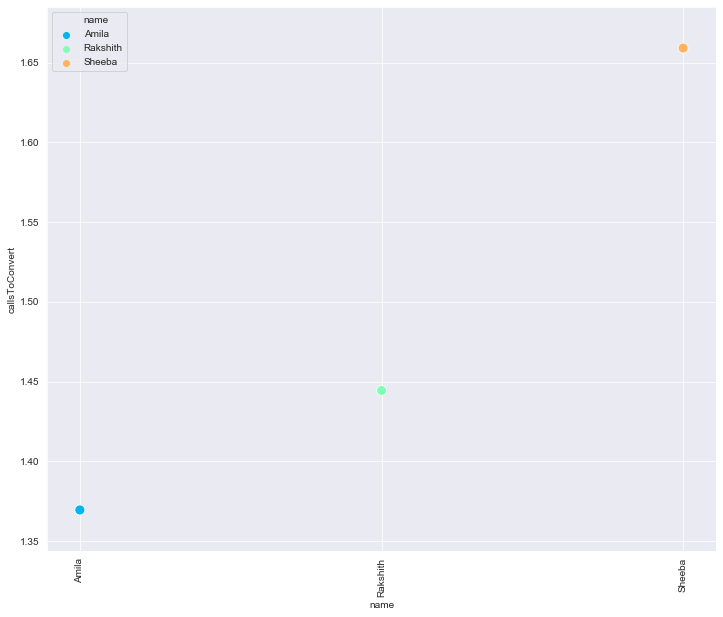

In [85]:
## plot the above table
plot_scatterplot(data = df_avg, x = 'name', y = 'callsToConvert', figsize = (12,10), hue = 'name')


In [56]:
## find calls to convert for each telecaller for each client

df_final = df_lc[['name', 'client', 'cumRank']].groupby(['name', 'client'], as_index = False).mean().rename(columns = {'cumRank' : 'callsToConvert'})
df_final

,name,client,callsToConvert
0,Amila,Amazon Flex,1.000000
1,Amila,Lalamove,1.777778
2,Amila,Lynk,2.000000
3,Amila,Rapido,1.000000
4,Amila,Swiggy,1.142857
5,Amila,Zomato,1.294118
6,Rakshith,Zomato,1.444444
7,Sheeba,1 MG,1.000000
8,Sheeba,Amazon Flex,2.000000
9,Sheeba,BharatPe,1.000000


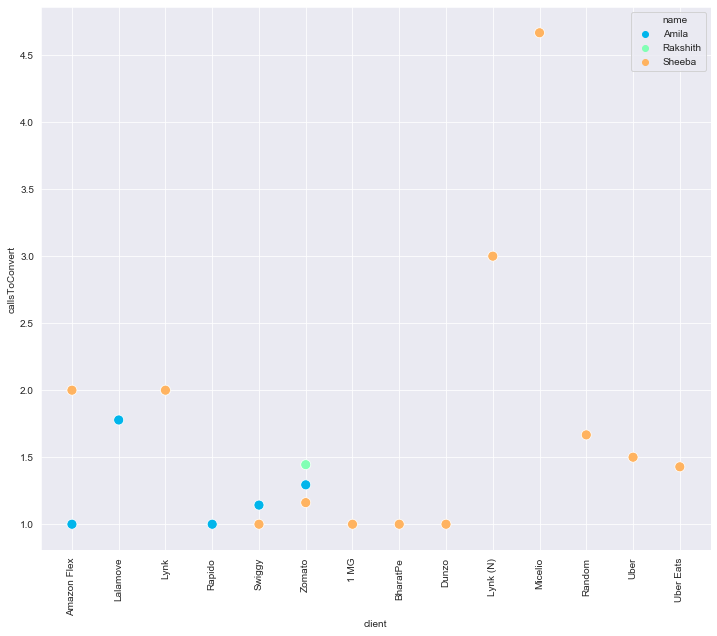

In [82]:
## plot the above table

plot_scatterplot(data = df_final, x = 'client', y = 'callsToConvert', figsize = (12,10), hue = 'name')


In [90]:
## remove outliers for Sheeba and recalculate callsToConvert number

df_sheeba = df_final[~df_final['client'].isin(['Lynk (N)', 'Micelio'])].reset_index(drop = True)
df_sheeba.groupby(by = ['name'], as_index = False).mean()


,name,callsToConvert
0,Amila,1.369125
1,Rakshith,1.444444
2,Sheeba,1.375653
